<a href="https://colab.research.google.com/github/SerraTalas/MachineLearningProjects/blob/main/KNN_Euclidean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/verimadenciligi/verikumesi2.csv')

In [ ]:
X= df.iloc[:, [1,30]].values
y= df.iloc[:,30].values

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42, stratify=y)

In [ ]:
def min_max_scale(data):
    min_val = data.min()
    max_val = data.max()
    scaled_data = (data - min_val) / (max_val - min_val)
    return scaled_data

# Eğitim seti ölçeklendirme
X_train_scaled = min_max_scale(X_train)

# Test seti ölçeklendirme
X_test_scaled = min_max_scale(X_test)


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# KNN sınıflandırıcısını oluştur
knn = KNeighborsClassifier(n_neighbors=10, metric='euclidean')

# Modeli eğit
knn.fit(X_train, y_train)

# Test veri kümesi üzerinde tahmin yap
y_pred = knn.predict(X_test)

# Performans metriklerini hesapla
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Sonuçları raporla
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.9961851475076297
Precision: 0.9879518072289156
Recall: 0.967551622418879
F1 Score: 0.977645305514158


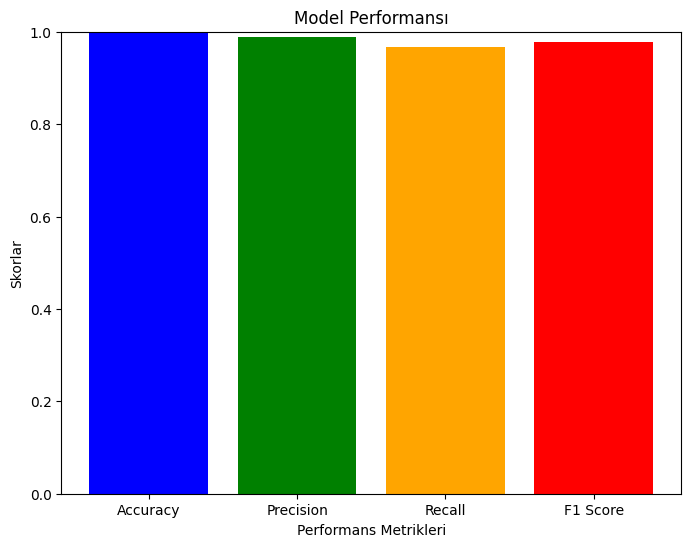

In [ ]:
import matplotlib.pyplot as plt

# Performans metriklerini saklayacak listeler oluştur
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
scores = [accuracy, precision, recall, f1]

# Sonuçları çiz
plt.figure(figsize=(8, 6))
plt.bar(metrics, scores, color=['blue', 'green', 'orange', 'red'])
plt.title('Model Performansı')
plt.xlabel('Performans Metrikleri')
plt.ylabel('Skorlar')
plt.ylim(0, 1)  # Y ekseni sınırlarını ayarla
plt.show()


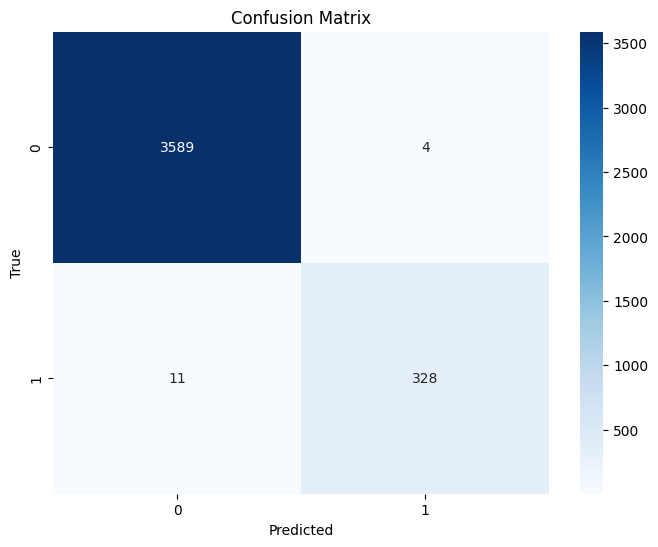

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Confusion matrix'i oluştur
conf_matrix = confusion_matrix(y_test, y_pred)

# Heatmap ile confusion matrix'i görselleştir
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
